# Part 1: Exploratory Data Analysis



### Imports

In [145]:
from google.colab import drive
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import matplotlib.patches as mpatches

In [146]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
users = pd.read_csv('/content/drive/MyDrive/Krikey/users.csv')
watchedVideo = pd.read_csv('/content/drive/MyDrive/Krikey/watchedVideo.csv')
videos = pd.read_csv('/content/drive/MyDrive/Krikey/videos.csv')

In [148]:
len(users['id'])

1000

In [149]:
len(videos['id'])

5000

In [150]:
len(watchedVideo['userId'])

50000

### Analysis (users dataset)

In [151]:
users.head(10)

,Unnamed: 0,id,created_at,class,coordinates
0,0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')"
1,1,27cf0bb6-3488-4662-916d-3ad04eeec9ca,2021-04-09 19:55:07,Viewer,"('43.71032', '-1.05366')"
2,2,5ebd5e12-ba2a-4bf9-b7e4-92ad24711cd4,2021-04-08 21:48:45,Super Gamer,"('51.26', '-2.1875')"
3,3,30986592-0cbf-43bb-83ed-7501ab3bd373,2021-05-15 00:45:51,Creator,"('40.65538', '-74.38987')"
4,4,25b49125-34d1-4694-a4a9-8415bcc3567b,2021-07-05 04:08:53,Viewer,"('35.61452', '-88.81395')"
5,5,cf3d9013-6417-4ed8-9d02-88a97f00c566,2021-10-03 18:00:05,Super Gamer,"('25.66795', '85.83636')"
6,6,097107fb-58ce-4802-bac9-bf3c3522ed7a,2021-05-22 14:20:10,Super Gamer,"('58.7002', '59.4839')"
7,7,a6c660aa-6e1c-4fd8-b497-c22c81486b08,2021-06-02 23:26:02,Super Gamer,"('51.64316', '-0.36053')"
8,8,9320d367-f137-45c8-8086-09aaa1aa4253,2021-02-05 00:40:23,Super Gamer,"('41.29444', '69.67639')"
9,9,aa2744a0-c356-44aa-be91-1880afdc4f32,2021-01-29 19:53:26,Viewer,"('31.82539', '72.54064')"


In [152]:
#Check for possible NaN values
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1000 non-null   int64 
 1   id           1000 non-null   object
 2   created_at   1000 non-null   object
 3   class        1000 non-null   object
 4   coordinates  1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [153]:
#Check uniqueness of id
len(users['id'].unique())

1000

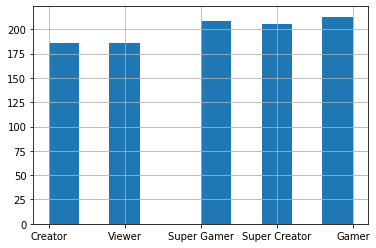

In [154]:
#Check class distribution --> balanced
users['class'].hist()

In [155]:
#Convert created_at feature to datetime format
users['created_at'] = pd.to_datetime(users['created_at'])

In [156]:
#Check the timerange of created_at attribute
users['created_at'].dt.year.unique()

array([2021])

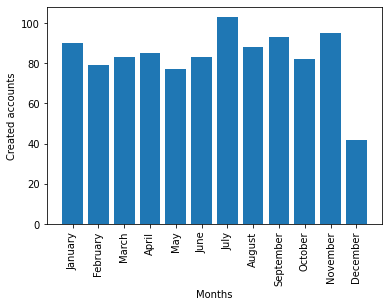

In [157]:
#Plot number of created accounts per month
created = users['created_at'].groupby([users.created_at.dt.month]).size()
months = ('January','February','March','April','May','June','July','August','September','October','November','December')

plt.bar(months,list(created.values))
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.ylabel('Created accounts')
plt.show()

In [158]:
#Group by month and class
created_class = users['created_at'].groupby([users.created_at.dt.month,users['class']]).size().unstack(level=-1)

created_class

class,Creator,Gamer,Super Creator,Super Gamer,Viewer
created_at,,,,,
1,15,14,20,27,14
2,19,13,16,19,12
3,16,19,18,17,13
4,13,17,11,17,27
5,19,14,14,12,18
6,12,15,15,23,18
7,16,20,17,21,29
8,17,18,22,17,14
9,16,27,17,20,13


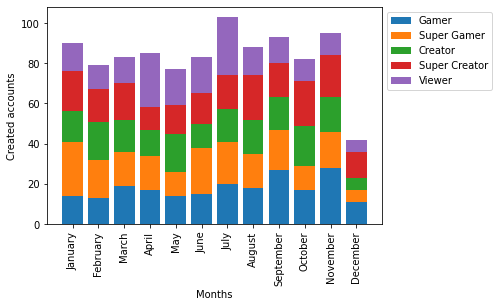

In [159]:
#Plot stacked bar chart with the class distribution each month

plt.bar(months, created_class['Gamer'], label='Gamer')
plt.bar(months, created_class['Super Gamer'], bottom=created_class['Gamer'], label='Super Gamer')
plt.bar(months, created_class['Creator'], bottom=created_class['Gamer']+created_class['Super Gamer'], label='Creator')
plt.bar(months, created_class['Super Creator'], bottom=created_class['Gamer']+created_class['Super Gamer']+created_class['Creator'], label='Super Creator')
plt.bar(months, created_class['Viewer'], bottom=created_class['Gamer']+created_class['Super Gamer']+created_class['Creator']+created_class['Super Creator'], label='Viewer')
    
plt.xlabel("Months")
plt.xticks(rotation=90)
plt.ylabel("Created accounts")
     
     
plt.legend(bbox_to_anchor=(1.0, 1.0))
     

plt.show()

In [160]:
#Geographical data

users[['latitude','longitude']] = users['coordinates'].str.split(',',expand=True)
users['latitude'] = pd.to_numeric(users['latitude'].str.replace("(", "").str.strip("'"))
users['longitude'] = pd.to_numeric(users['longitude'].str.strip(")").str.replace("'",""))
users.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,Unnamed: 0,id,created_at,class,coordinates,latitude,longitude
0,0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')",36.76775,2.95924
1,1,27cf0bb6-3488-4662-916d-3ad04eeec9ca,2021-04-09 19:55:07,Viewer,"('43.71032', '-1.05366')",43.71032,-1.05366
2,2,5ebd5e12-ba2a-4bf9-b7e4-92ad24711cd4,2021-04-08 21:48:45,Super Gamer,"('51.26', '-2.1875')",51.26000,-2.18750
3,3,30986592-0cbf-43bb-83ed-7501ab3bd373,2021-05-15 00:45:51,Creator,"('40.65538', '-74.38987')",40.65538,-74.38987
4,4,25b49125-34d1-4694-a4a9-8415bcc3567b,2021-07-05 04:08:53,Viewer,"('35.61452', '-88.81395')",35.61452,-88.81395


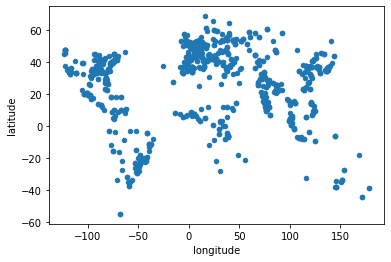

In [161]:
#Plot the data to see the distribution

users.plot(x='longitude',y='latitude',kind='scatter')

In [162]:
#Plot the data on a world map

fig = px.scatter_geo(users,lat='latitude',lon='longitude', hover_name="class")
fig.update_layout(title = 'Accounts world distribution', title_x=0.5)
fig.show()

In [163]:
#Plot the created account distribution based on the time they've been created

users['Months'] = users['created_at'].dt.month
fig = px.scatter_geo(users,lat='latitude',lon='longitude', color = "Months" ,hover_name="class")
fig.update_layout(title = 'Accounts world distribution', title_x=0.5)
fig.show()

### Analysis (users-watchedVideo datasets)

In [164]:
watchedVideo.head(10)

,Unnamed: 0,coordinates,os,duration,videoId,userId,appVersion,dateTime,feedId
0,0,"(Decimal('14.439490'), Decimal('105.291233'))",iOS,3.95,722e110c-2f81-46aa-9c25-4d26fd77519f,317a2bc3-5f95-4d35-9a94-1f2f38424c4f,2.2.2,2021-08-04 09:39:07,30134b9e-1b79-43fb-b0c5-373af9237b2c
1,1,"(Decimal('40.866935'), Decimal('-73.845013'))",iOS,5.95,cc10d153-37f9-42b5-8d78-2365908acf2b,db031c3d-69e4-4c06-91fe-e9be0a3c173c,2.2.1,2021-07-06 16:32:10,8078efe7-5bae-4528-9a66-b85904cc73ac
2,2,"(Decimal('48.666850'), Decimal('9.359456'))",iOS,0.69,7f3f7fce-f2ec-4dfd-bac8-92dc7865a365,8fb18b66-f548-42a7-b394-c1be963cac29,2.2.0,2021-12-06 01:42:02,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1
3,3,"(Decimal('5.172365'), Decimal('-74.439009'))",Android,2.81,8ffc47e3-32ce-4d24-a990-9baac556603b,960fb90e-eddc-478a-a64a-04b9dded3a05,2.1.2,2021-12-04 21:02:50,42568c8a-efbe-4293-81a3-513e33094ade
4,4,"(Decimal('4.063707'), Decimal('9.606159'))",iOS,5.88,47e70477-7511-4bd0-801b-1651f951002f,1ce0c003-25e7-473f-8796-0fe04d6c275c,2.1.2,2021-11-28 16:12:39,582520b2-b30a-4ecb-b1b4-1806672fcfc4
5,5,"(Decimal('41.570279'), Decimal('-70.967717'))",Android,4.87,5d7a3e96-8f2a-414d-9816-36d92f8f0474,eb2151e6-7988-4a4b-9948-2ccdc946ca90,2.1.1,2021-11-14 16:13:41,582520b2-b30a-4ecb-b1b4-1806672fcfc4
6,6,"(Decimal('52.407226'), Decimal('9.541979'))",iOS,5.28,4782aabd-6a69-4b6c-97c3-3b29926c3c94,542b473f-f1cb-4c7f-b838-efc46ec00c7e,3.0.0,2021-11-12 18:21:54,42568c8a-efbe-4293-81a3-513e33094ade
7,7,"(Decimal('42.873142'), Decimal('126.164553'))",iOS,4.95,1192e406-fce3-45e8-b181-1c0779fc089b,53e37d5b-b148-401e-884c-7d6b3123d7dc,3.0.1,2021-11-23 01:11:35,c9d59470-c4ee-43ff-831d-b52508c8d848
8,8,"(Decimal('44.487339'), Decimal('-93.548421'))",iOS,6.84,93733f0c-af12-49de-b600-f187dadd3b33,55a3264e-0f39-438a-b170-4f685372cb0b,2.2.2,2021-12-12 06:00:20,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1
9,9,"(Decimal('32.816216'), Decimal('-117.131414'))",Android,4.82,56e4dae1-f8f5-4f5b-bdf8-1674862ed09e,ff1946db-e085-4d32-aa19-e6f01e055416,2.2.2,2021-12-14 18:52:01,8078efe7-5bae-4528-9a66-b85904cc73ac


In [165]:
#Merge datasets

user_watched = pd.merge(left=users, right=watchedVideo, how='left', left_on='id', right_on='userId')
user_watched.head(10)

,Unnamed: 0_x,id,created_at,class,coordinates_x,latitude,longitude,Months,Unnamed: 0_y,coordinates_y,os,duration,videoId,userId,appVersion,dateTime,feedId
0,0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')",36.76775,2.95924,3,3006,"(Decimal('36.210986'), Decimal('3.002927'))",iOS,0.26,06904c1f-6cce-49e9-a41b-83bc7c02ccba,37e369a8-4477-4d5d-acd7-4e3b8059586e,2.1.0,2021-11-09 09:55:46,582520b2-b30a-4ecb-b1b4-1806672fcfc4
1,0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')",36.76775,2.95924,3,5915,"(Decimal('37.124095'), Decimal('3.178305'))",iOS,1.38,c201036c-a545-420d-a190-87666cb9ad1e,37e369a8-4477-4d5d-acd7-4e3b8059586e,2.1.0,2021-11-09 14:51:52,644a3cb6-e266-4757-9e96-a3ee049216fe
2,0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')",36.76775,2.95924,3,6059,"(Decimal('36.705675'), Decimal('2.600578'))",Android,3.79,48dbea62-582c-47ac-b19b-12aca480bd45,37e369a8-4477-4d5d-acd7-4e3b8059586e,2.1.0,2021-11-19 13:17:49,a8a04865-55d4-4de4-8141-b273b678299f
3,0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')",36.76775,2.95924,3,8214,"(Decimal('36.602653'), Decimal('3.115211'))",iOS,1.58,cd434fc2-e32c-4d3a-94cb-87758f937d15,37e369a8-4477-4d5d-acd7-4e3b8059586e,2.2.0,2021-10-05 05:05:22,c9d59470-c4ee-43ff-831d-b52508c8d848
4,0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')",36.76775,2.95924,3,8985,"(Decimal('37.149065'), Decimal('3.387821'))",iOS,4.31,39fb1953-1488-4131-b52c-d990485f62bd,37e369a8-4477-4d5d-acd7-4e3b8059586e,2.1.1,2021-10-29 01:27:02,c9d59470-c4ee-43ff-831d-b52508c8d848
5,0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')",36.76775,2.95924,3,11098,"(Decimal('36.824434'), Decimal('3.486713'))",Android,1.53,3aee201f-74f3-48b0-9305-fe3c4f8bc521,37e369a8-4477-4d5d-acd7-4e3b8059586e,3.0.1,2021-12-02 16:53:50,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1
6,0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')",36.76775,2.95924,3,11111,"(Decimal('36.501771'), Decimal('3.019973'))",Android,5.45,3e1c8c0f-c563-4373-a6f1-0e3ef637ad96,37e369a8-4477-4d5d-acd7-4e3b8059586e,2.2.1,2021-12-09 00:12:21,644a3cb6-e266-4757-9e96-a3ee049216fe
7,0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')",36.76775,2.95924,3,12100,"(Decimal('36.263290'), Decimal('3.585739'))",Android,4.54,4cbe58e3-976e-43b5-b8f8-7d9bc6159038,37e369a8-4477-4d5d-acd7-4e3b8059586e,2.1.2,2021-10-10 02:15:34,a8a04865-55d4-4de4-8141-b273b678299f
8,0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')",36.76775,2.95924,3,13278,"(Decimal('36.865777'), Decimal('2.891970'))",Android,3.34,ac3c7351-9520-418d-a60d-dfde81aebcc1,37e369a8-4477-4d5d-acd7-4e3b8059586e,2.2.2,2021-10-08 05:12:04,644a3cb6-e266-4757-9e96-a3ee049216fe
9,0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')",36.76775,2.95924,3,17459,"(Decimal('37.283432'), Decimal('2.812074'))",Android,2.97,bc3606de-2944-486e-88ac-aaf1a001ca1f,37e369a8-4477-4d5d-acd7-4e3b8059586e,2.2.2,2021-11-29 19:24:26,8078efe7-5bae-4528-9a66-b85904cc73ac


In [166]:
#Drop some non-useful columns

user_watched = user_watched.drop(['Unnamed: 0_x','Unnamed: 0_y','coordinates_x','userId'],axis=1)

In [167]:
user_watched.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             50000 non-null  object        
 1   created_at     50000 non-null  datetime64[ns]
 2   class          50000 non-null  object        
 3   latitude       50000 non-null  float64       
 4   longitude      50000 non-null  float64       
 5   Months         50000 non-null  int64         
 6   coordinates_y  50000 non-null  object        
 7   os             50000 non-null  object        
 8   duration       50000 non-null  float64       
 9   videoId        50000 non-null  object        
 10  appVersion     50000 non-null  object        
 11  dateTime       50000 non-null  object        
 12  feedId         50000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 5.3+ MB


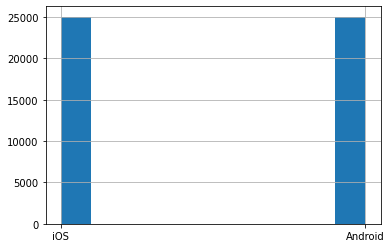

In [168]:
#A first visualization of the most used OS (without grouping by id)

user_watched['os'].hist()

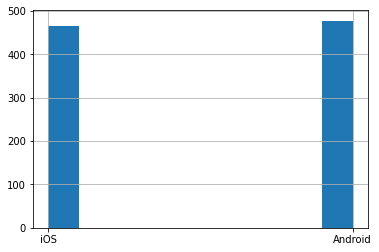

In [169]:
#Group by id --> based on id preference, see what os is mostly used

preferred_os = user_watched['os'].groupby([user_watched.id,user_watched.os]).size().unstack(level=-1)
preferred_os = preferred_os.loc[preferred_os['Android']!=preferred_os['iOS']]

#Assumption: if user use more iOS --> iOS, otherwise Android
preferred_os['Preference'] = np.where((preferred_os['iOS'] > preferred_os['Android']), 'iOS', 'Android')

preferred_os['Preference'].hist()

In [ ]:
#Average time users watch videos

avg = user_watched['duration'].mean()
avg = str(round(avg, 2))
print('Average duration: ' + avg + ' seconds')

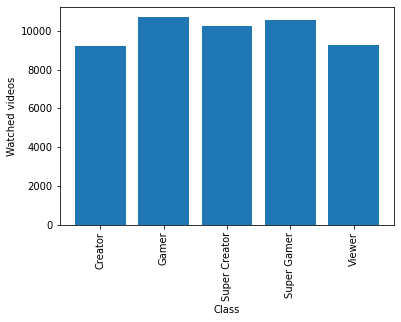

In [171]:
#Most active class of users

user_class =  user_watched.groupby([user_watched['class']]).size().to_frame('activity').reset_index()

plt.bar(user_class['class'],user_class['activity'])
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Watched videos')
plt.show()

In [172]:
#Most active users position

user_position =  user_watched.groupby([user_watched.latitude,user_watched.longitude]).size().to_frame('Activity').reset_index()
#Drop higher activity user to have a more balanced color scale
user_position = user_position.loc[user_position['Activity'] <= 200] 
fig = px.scatter_geo(user_position,lat='latitude',lon='longitude', color = 'Activity')
fig.update_layout(title = 'Activity of accounts', title_x=0.5)
fig.show()

In [173]:
#Time of the day users watch videos

user_watched['dateTime'] = pd.to_datetime(user_watched['dateTime'])
user_watched['time'] = user_watched['dateTime'].dt.time

b = [6,12,18,24]
l = ['Morning','Afternoon','Evening']
daytime = pd.cut(user_watched.dateTime.dt.hour, bins=b, labels=l, include_lowest=True).to_frame()
daytime = daytime['dateTime'].cat.add_categories("Night").fillna("Night")

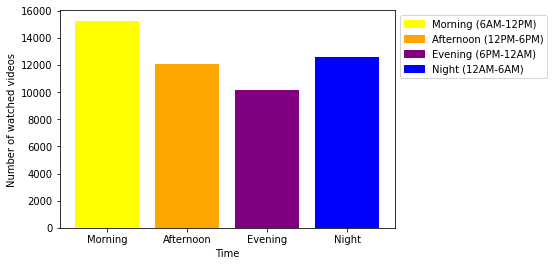

In [174]:
daytime = daytime.to_frame()

intervals = ('Morning','Afternoon','Evening','Night')
plt.bar(intervals,daytime.groupby(daytime['dateTime']).size(), color=['yellow', 'orange', 'purple', 'blue'])
plt.xlabel('Time')
plt.ylabel('Number of watched videos')

yellow_patch = mpatches.Patch(color='yellow', label='Morning (6AM-12PM)')
orange_patch = mpatches.Patch(color='orange', label='Afternoon (12PM-6PM)')
purple_patch = mpatches.Patch(color='purple', label='Evening (6PM-12AM)')
blue_patch = mpatches.Patch(color='blue', label='Night (12AM-6AM)')

plt.legend(handles=[yellow_patch, orange_patch, purple_patch, blue_patch], bbox_to_anchor=(1.0, 1.0))

plt.show()

### Analysis (users-watchedVideo-videos datasets)

In [175]:
videos.head(5)

,Unnamed: 0,id,attribute_id,music_id,animation_id,duration,creator,created_at,num_shares,game_id,is_ar
0,0,6e884071-8c0e-4782-aa40-e0fd78243360,4712e9e6-bef1-4646-b21e-ca5336901bf9,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,17dab81c-6180-4a4b-b539-91978a726cfd,5.34,73ec1ac2-d148-45ac-94a8-9bdff51730d7,2021-08-04 10:42:39,12,8bd4c7be-fe87-45ad-990d-d131cd3d9c77,True
1,1,ac90ff16-24b4-46bc-ae72-2da847f9e6c9,4f91d2b6-bf42-4d3f-a8e8-acc3b07f647e,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,6d7a0545-0bca-4bf4-a306-931e57d8ffe2,3.88,0230f9af-e89f-4886-8322-52a38eaf991c,2021-11-27 10:06:43,3,6ca0f645-a16b-42b0-9dc2-2ae952c83591,True
2,2,fb5eaf0d-e72c-4523-b5c5-4d9c323cef5f,80f5b187-f6e6-40f2-9b6e-fe62b67049a8,d53234f4-1efb-4299-97c1-11658118cba5,716c02df-bd3a-41c9-b2be-86fb74ff3255,5.15,fbf93fbf-a935-436f-8516-8acb863e779f,2021-02-26 04:18:53,4,6ca0f645-a16b-42b0-9dc2-2ae952c83591,True
3,3,bbf89dcb-7fbd-439d-9a7d-36ef7a1c2aa3,02b2b662-1b39-4d91-9417-dddc9451d8e1,19e4db13-d854-4913-a8ca-3612ee1a6071,b7bd5204-2976-4eb0-ab71-508a848bc325,6.50,f7a2adb8-44d7-4408-a2a9-3a593fc6d626,2021-11-27 02:08:02,9,8bd4c7be-fe87-45ad-990d-d131cd3d9c77,False
4,4,4c613ec6-fa6f-47e8-b4ab-658e2f6a644d,06c496ee-e884-42f9-ba39-010a66ed5296,b5b679a5-e769-4d95-82a6-f75e439b1ef9,17dab81c-6180-4a4b-b539-91978a726cfd,4.38,d9f9538f-1b7e-4f35-805d-924b309d75d8,2021-11-17 11:06:32,14,2609b6b5-3a08-451e-bce5-75fe506559d2,False


In [176]:
user_watched_video = pd.merge(left=user_watched, right=videos, how='left', left_on='videoId', right_on='id')
user_watched_video = user_watched_video.drop(['id_y'], axis = 1)
user_watched_video.head(5)

,id_x,created_at_x,class,latitude,longitude,Months,coordinates_y,os,duration_x,videoId,...,Unnamed: 0,attribute_id,music_id,animation_id,duration_y,creator,created_at_y,num_shares,game_id,is_ar
0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,36.76775,2.95924,3,"(Decimal('36.210986'), Decimal('3.002927'))",iOS,0.26,06904c1f-6cce-49e9-a41b-83bc7c02ccba,...,3562,02b2b662-1b39-4d91-9417-dddc9451d8e1,d53234f4-1efb-4299-97c1-11658118cba5,17dab81c-6180-4a4b-b539-91978a726cfd,5.52,faffb3fd-9013-429d-91e2-95f42ef52a15,2021-09-10 06:53:05,1,66653b7c-b600-49b3-a58c-d1862e91d426,True
1,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,36.76775,2.95924,3,"(Decimal('37.124095'), Decimal('3.178305'))",iOS,1.38,c201036c-a545-420d-a190-87666cb9ad1e,...,721,4f91d2b6-bf42-4d3f-a8e8-acc3b07f647e,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,4cfc4892-2c7e-46e3-8399-5b138285d394,2.67,f65c0e82-5648-4270-b525-e11e40a30974,2021-10-19 11:49:05,0,4d54f6ab-cd8f-43a5-9be0-c497c2c32d24,False
2,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,36.76775,2.95924,3,"(Decimal('36.705675'), Decimal('2.600578'))",Android,3.79,48dbea62-582c-47ac-b19b-12aca480bd45,...,3084,e339ba35-ffef-403b-a17c-dd218fdbb915,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,716c02df-bd3a-41c9-b2be-86fb74ff3255,3.79,9901ccc8-35bb-416b-bbe1-4f2bf0377e6d,2021-11-18 07:38:15,7,4d54f6ab-cd8f-43a5-9be0-c497c2c32d24,True
3,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,36.76775,2.95924,3,"(Decimal('36.602653'), Decimal('3.115211'))",iOS,1.58,cd434fc2-e32c-4d3a-94cb-87758f937d15,...,2926,4f91d2b6-bf42-4d3f-a8e8-acc3b07f647e,3de11516-8627-47c3-98ab-265b429cac91,d167d0af-a662-48ad-bb39-5aa306fc8141,4.16,5202cd85-2bbb-4dad-aa92-36ef1a202007,2021-03-01 17:26:36,2,6ca0f645-a16b-42b0-9dc2-2ae952c83591,True
4,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,36.76775,2.95924,3,"(Decimal('37.149065'), Decimal('3.387821'))",iOS,4.31,39fb1953-1488-4131-b52c-d990485f62bd,...,4044,4712e9e6-bef1-4646-b21e-ca5336901bf9,19e4db13-d854-4913-a8ca-3612ee1a6071,17dab81c-6180-4a4b-b539-91978a726cfd,4.31,49ccd0e4-42b8-4e43-860c-fb5a2b19bfea,2021-09-29 19:06:52,1,4d54f6ab-cd8f-43a5-9be0-c497c2c32d24,True


In [177]:
user_watched_video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_x           50000 non-null  object        
 1   created_at_x   50000 non-null  datetime64[ns]
 2   class          50000 non-null  object        
 3   latitude       50000 non-null  float64       
 4   longitude      50000 non-null  float64       
 5   Months         50000 non-null  int64         
 6   coordinates_y  50000 non-null  object        
 7   os             50000 non-null  object        
 8   duration_x     50000 non-null  float64       
 9   videoId        50000 non-null  object        
 10  appVersion     50000 non-null  object        
 11  dateTime       50000 non-null  datetime64[ns]
 12  feedId         50000 non-null  object        
 13  time           50000 non-null  object        
 14  Unnamed: 0     50000 non-null  int64         
 15  attribute_id   5000

In [178]:
#Drop 'Unnamed' column

user_watched_video = user_watched_video.drop(user_watched_video.columns[[14]],axis=1)

In [179]:
#Transform bools into 0/1

user_watched_video['is_ar'].replace({False: 0, True: 1}, inplace=True)


In [180]:
#Explore attribute id

user_watched_video['attribute_id'].unique()

#Map them

attributes = {'02b2b662-1b39-4d91-9417-dddc9451d8e1':'A',
              '4f91d2b6-bf42-4d3f-a8e8-acc3b07f647e':'B',
              'e339ba35-ffef-403b-a17c-dd218fdbb915':'C',
              '4712e9e6-bef1-4646-b21e-ca5336901bf9':'D',
              '3390e253-7815-4a3c-8169-fd2ab532e166':'E',
              '30fa7949-1cb6-44b1-9c7b-42c7421fc504':'F',
              'c3328117-4129-4d8b-8250-9479e9c6a389':'G',
              '80f5b187-f6e6-40f2-9b6e-fe62b67049a8':'H',
              '06c496ee-e884-42f9-ba39-010a66ed5296':'I',
              '25e7fab9-abfb-4a74-a8cb-c3adbc6e3531':'J',
              '7ef48c9e-776d-4d24-8c2b-e3675b295767':'K'
              }

user_watched_video['attribute_id'] = user_watched_video['attribute_id'].map(attributes)

In [181]:
#Explore music id

user_watched_video['music_id'].unique()

#Map them

m_attributes = {'d53234f4-1efb-4299-97c1-11658118cba5':'M1',
              '4ee0de5b-e27f-4d73-a3c6-52cf26e36c54':'M2',
              '3de11516-8627-47c3-98ab-265b429cac91':'M3',
              '19e4db13-d854-4913-a8ca-3612ee1a6071':'M4',
              'c3721b09-6896-465a-8e13-4d73efd06874':'M5',
              '8ff50feb-3b5d-4dd0-84b0-8409753bd166':'M6',
              'b5b679a5-e769-4d95-82a6-f75e439b1ef9':'M7',
              'da2fc9b0-32d5-4a1b-8b40-2706eb133bf0':'M8',
              'e2bf5d12-edc2-47cb-b23f-1f4f7c1a2292':'M9',
              '1f80192e-3bff-41b8-b272-7062b9d7b6de':'M10',
              }

user_watched_video['music_id'] = user_watched_video['music_id'].map(m_attributes)

In [182]:
#Explore animation id

user_watched_video['animation_id'].unique()

#Map them

a_attributes = {'17dab81c-6180-4a4b-b539-91978a726cfd':'A1',
              '4cfc4892-2c7e-46e3-8399-5b138285d394':'A2',
              '716c02df-bd3a-41c9-b2be-86fb74ff3255':'A3',
              'd167d0af-a662-48ad-bb39-5aa306fc8141':'A4',
              '08dda558-a151-45a2-8e43-1ba6f2891800':'A5',
              'b5349df0-23dd-4973-b47d-ae5df5a4e247':'A6',
              'ab5dc9f1-deb4-44d4-88ff-62e473a060f4':'A7',
              '2029f213-1719-4108-8125-25d465cf475d':'A8',
              '542d7532-e88a-48ca-826f-c11f0f615bc4':'A9',
              '435320a3-8d3d-4a9d-b76b-2f2e268f7619':'A10',
              'b7bd5204-2976-4eb0-ab71-508a848bc325':'A11',
              'ff1a548b-e307-474c-a405-6370ca1a0639':'A12',
              'ace4c5e2-ef86-429a-aad3-23bef7a1c9f1':'A13',
              '6d7a0545-0bca-4bf4-a306-931e57d8ffe2':'A14',
              '7410fff9-7a21-4c93-8a54-a6f4c9e55b04':'A15'
              }

user_watched_video['animation_id'] = user_watched_video['animation_id'].map(a_attributes)

In [183]:
#Explore game id

user_watched_video['game_id'].unique()

#Map them

g_attributes = {'66653b7c-b600-49b3-a58c-d1862e91d426':'G1',
                '4d54f6ab-cd8f-43a5-9be0-c497c2c32d24':'G2',
                '6ca0f645-a16b-42b0-9dc2-2ae952c83591':'G3',
                '2609b6b5-3a08-451e-bce5-75fe506559d2':'G4',
                '8bd4c7be-fe87-45ad-990d-d131cd3d9c77':'G5'
                }

user_watched_video['game_id'] = user_watched_video['game_id'].map(g_attributes)

In [184]:
user_watched_video.head(5)

,id_x,created_at_x,class,latitude,longitude,Months,coordinates_y,os,duration_x,videoId,...,time,attribute_id,music_id,animation_id,duration_y,creator,created_at_y,num_shares,game_id,is_ar
0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,36.76775,2.95924,3,"(Decimal('36.210986'), Decimal('3.002927'))",iOS,0.26,06904c1f-6cce-49e9-a41b-83bc7c02ccba,...,09:55:46,A,M1,A1,5.52,faffb3fd-9013-429d-91e2-95f42ef52a15,2021-09-10 06:53:05,1,G1,1
1,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,36.76775,2.95924,3,"(Decimal('37.124095'), Decimal('3.178305'))",iOS,1.38,c201036c-a545-420d-a190-87666cb9ad1e,...,14:51:52,B,M2,A2,2.67,f65c0e82-5648-4270-b525-e11e40a30974,2021-10-19 11:49:05,0,G2,0
2,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,36.76775,2.95924,3,"(Decimal('36.705675'), Decimal('2.600578'))",Android,3.79,48dbea62-582c-47ac-b19b-12aca480bd45,...,13:17:49,C,M2,A3,3.79,9901ccc8-35bb-416b-bbe1-4f2bf0377e6d,2021-11-18 07:38:15,7,G2,1
3,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,36.76775,2.95924,3,"(Decimal('36.602653'), Decimal('3.115211'))",iOS,1.58,cd434fc2-e32c-4d3a-94cb-87758f937d15,...,05:05:22,B,M3,A4,4.16,5202cd85-2bbb-4dad-aa92-36ef1a202007,2021-03-01 17:26:36,2,G3,1
4,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,36.76775,2.95924,3,"(Decimal('37.149065'), Decimal('3.387821'))",iOS,4.31,39fb1953-1488-4131-b52c-d990485f62bd,...,01:27:02,D,M4,A1,4.31,49ccd0e4-42b8-4e43-860c-fb5a2b19bfea,2021-09-29 19:06:52,1,G2,1


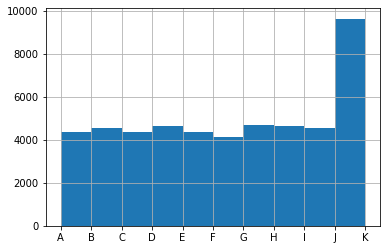

In [185]:
#Most used attributes

user_watched_video['attribute_id'].hist()

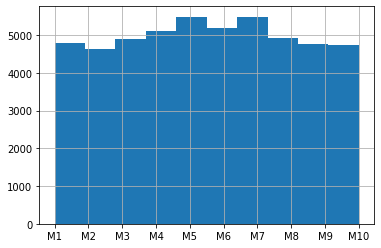

In [186]:
#Most used music

user_watched_video['music_id'].hist()

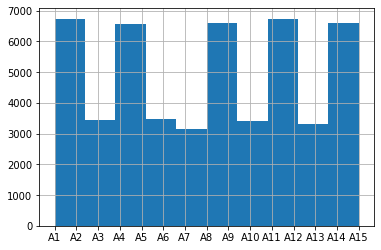

In [187]:
#Most used animation

user_watched_video['animation_id'].hist()

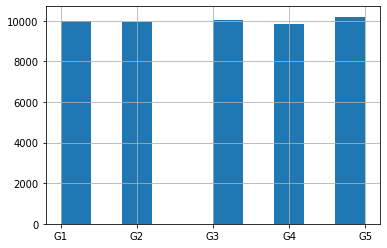

In [188]:
#Most played games

user_watched_video['game_id'].hist()

In [189]:
#Sharing

sharing = user_watched_video.groupby([user_watched_video['videoId']])['num_shares'].sum().reset_index()
user_watched_video = pd.merge(left=user_watched_video, right=sharing, how='inner', left_on='videoId', right_on='videoId')
user_watched_video.head(5)

,id_x,created_at_x,class,latitude,longitude,Months,coordinates_y,os,duration_x,videoId,...,attribute_id,music_id,animation_id,duration_y,creator,created_at_y,num_shares_x,game_id,is_ar,num_shares_y
0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,36.76775,2.95924,3,"(Decimal('36.210986'), Decimal('3.002927'))",iOS,0.26,06904c1f-6cce-49e9-a41b-83bc7c02ccba,...,A,M1,A1,5.52,faffb3fd-9013-429d-91e2-95f42ef52a15,2021-09-10 06:53:05,1,G1,1,9
1,bf32c7a6-67fd-4b2c-8b1c-0c6c208a2667,2021-07-29 11:22:13,Super Creator,-38.16604,145.13643,7,"(Decimal('-38.251916'), Decimal('145.933707'))",Android,2.85,06904c1f-6cce-49e9-a41b-83bc7c02ccba,...,A,M1,A1,5.52,faffb3fd-9013-429d-91e2-95f42ef52a15,2021-09-10 06:53:05,1,G1,1,9
2,9b473171-e8c2-48ab-b7a7-6b451d60ee35,2021-03-15 04:49:26,Creator,-6.25000,38.66667,3,"(Decimal('-5.207331'), Decimal('38.330487'))",Android,2.88,06904c1f-6cce-49e9-a41b-83bc7c02ccba,...,A,M1,A1,5.52,faffb3fd-9013-429d-91e2-95f42ef52a15,2021-09-10 06:53:05,1,G1,1,9
3,8bee6ade-1d9f-453e-b1ec-9a2c2bd5a973,2021-05-01 12:19:52,Creator,26.76628,83.36889,5,"(Decimal('26.288836'), Decimal('82.403684'))",Android,5.52,06904c1f-6cce-49e9-a41b-83bc7c02ccba,...,A,M1,A1,5.52,faffb3fd-9013-429d-91e2-95f42ef52a15,2021-09-10 06:53:05,1,G1,1,9
4,854d6288-0532-47c4-b908-b07dae2e8f77,2021-07-30 22:49:46,Gamer,-33.88096,151.07986,7,"(Decimal('-34.143215'), Decimal('151.171403'))",iOS,5.52,06904c1f-6cce-49e9-a41b-83bc7c02ccba,...,A,M1,A1,5.52,faffb3fd-9013-429d-91e2-95f42ef52a15,2021-09-10 06:53:05,1,G1,1,9


In [190]:
#Num views

num_viewes = user_watched_video.groupby([user_watched_video['videoId']]).size().to_frame('num_viewes').reset_index()
user_watched_video = pd.merge(left=user_watched_video, right=num_viewes, how='inner', left_on='videoId', right_on='videoId')
user_watched_video.head(5)

,id_x,created_at_x,class,latitude,longitude,Months,coordinates_y,os,duration_x,videoId,...,music_id,animation_id,duration_y,creator,created_at_y,num_shares_x,game_id,is_ar,num_shares_y,num_viewes
0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,36.76775,2.95924,3,"(Decimal('36.210986'), Decimal('3.002927'))",iOS,0.26,06904c1f-6cce-49e9-a41b-83bc7c02ccba,...,M1,A1,5.52,faffb3fd-9013-429d-91e2-95f42ef52a15,2021-09-10 06:53:05,1,G1,1,9,9
1,bf32c7a6-67fd-4b2c-8b1c-0c6c208a2667,2021-07-29 11:22:13,Super Creator,-38.16604,145.13643,7,"(Decimal('-38.251916'), Decimal('145.933707'))",Android,2.85,06904c1f-6cce-49e9-a41b-83bc7c02ccba,...,M1,A1,5.52,faffb3fd-9013-429d-91e2-95f42ef52a15,2021-09-10 06:53:05,1,G1,1,9,9
2,9b473171-e8c2-48ab-b7a7-6b451d60ee35,2021-03-15 04:49:26,Creator,-6.25000,38.66667,3,"(Decimal('-5.207331'), Decimal('38.330487'))",Android,2.88,06904c1f-6cce-49e9-a41b-83bc7c02ccba,...,M1,A1,5.52,faffb3fd-9013-429d-91e2-95f42ef52a15,2021-09-10 06:53:05,1,G1,1,9,9
3,8bee6ade-1d9f-453e-b1ec-9a2c2bd5a973,2021-05-01 12:19:52,Creator,26.76628,83.36889,5,"(Decimal('26.288836'), Decimal('82.403684'))",Android,5.52,06904c1f-6cce-49e9-a41b-83bc7c02ccba,...,M1,A1,5.52,faffb3fd-9013-429d-91e2-95f42ef52a15,2021-09-10 06:53:05,1,G1,1,9,9
4,854d6288-0532-47c4-b908-b07dae2e8f77,2021-07-30 22:49:46,Gamer,-33.88096,151.07986,7,"(Decimal('-34.143215'), Decimal('151.171403'))",iOS,5.52,06904c1f-6cce-49e9-a41b-83bc7c02ccba,...,M1,A1,5.52,faffb3fd-9013-429d-91e2-95f42ef52a15,2021-09-10 06:53:05,1,G1,1,9,9


In [191]:
#Popularity = sharing x num_views

user_watched_video['num_shares_y'] = user_watched_video['num_shares_y'] + 1 #augment the number of shares by 1 so that there are no 0 entries

In [192]:
user_watched_video['Popularity'] = user_watched_video['num_shares_y'] * user_watched_video['num_viewes']

In [193]:
#Dataframe to compute popularity stats

stats = user_watched_video.groupby(['videoId','attribute_id','music_id','animation_id','game_id','is_ar','Popularity']).size().to_frame('Count').reset_index()

In [194]:
#Sort by popularity score --> check the first 10 and their characteristics

sorted = stats.sort_values(by=['Popularity'],ascending=False)
sorted.head(10)

,videoId,attribute_id,music_id,animation_id,game_id,is_ar,Popularity,Count
686,241ed4cb-e1bc-4892-9d29-304a9b5f8848,K,M5,A11,G1,1,10968,24
1698,59f9231a-a11e-49c0-a7ae-a7bb50ef63dd,K,M3,A3,G1,1,7239,19
485,19cf19f1-46c0-44e4-b805-6ab548718db1,J,M4,A4,G1,1,7220,20
1034,364af14f-479d-496d-bfb4-d506ce4be4ae,D,M5,A11,G3,0,6878,19
2697,8cf92ea0-9eca-46a7-b05b-8c9986346ddb,K,M7,A12,G1,1,6878,19
1377,4950c21e-2739-4daa-bd66-8a8a81a693c1,K,M4,A7,G3,0,6636,21
1699,5a05051d-77db-41f1-8243-ec6e3f4f4426,E,M5,A7,G5,1,6517,19
1762,5da0849f-1e4b-4254-a369-1ff7b4dd5912,H,M8,A10,G3,0,6498,18
472,192c21b5-acff-4409-a114-f6e5e94a16a1,J,M3,A10,G3,0,6156,19
1279,434d871e-3e97-4ccf-ae1c-54d4cb577132,J,M2,A6,G4,1,5850,18


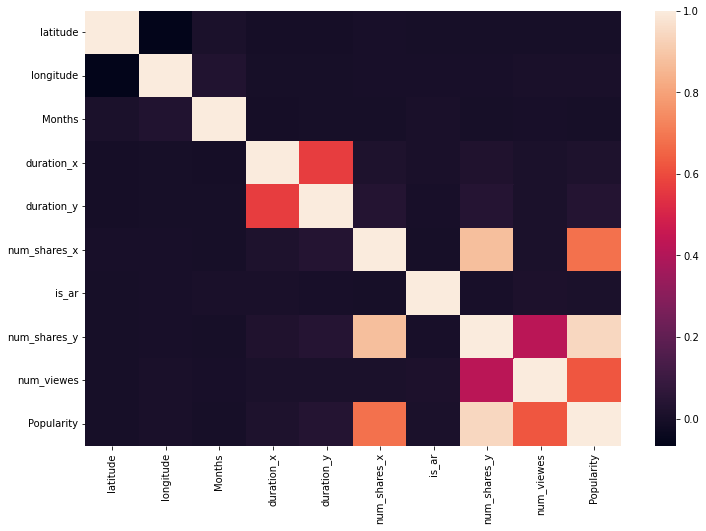

In [195]:
#Plot correlation matrix of numeric fields --> starting point for future further analysis

corr = user_watched_video.corr() 
plt.subplots(figsize=(12,8))
sns.heatmap(corr, xticklabels=corr.columns,
yticklabels=corr.columns)

### Appendix (future work)

In [196]:
#Check the users that are also video creators

creators = pd.merge(left=users, right=videos, how='inner', left_on='id', right_on='creator')

In [197]:
creators

,Unnamed: 0_x,id_x,created_at_x,class,coordinates,latitude,longitude,Months,Unnamed: 0_y,id_y,attribute_id,music_id,animation_id,duration,creator,created_at_y,num_shares,game_id,is_ar
0,0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')",36.76775,2.95924,3,702,c2df6704-4f1d-4ab3-be0d-8ee70a2e2bb4,02b2b662-1b39-4d91-9417-dddc9451d8e1,da2fc9b0-32d5-4a1b-8b40-2706eb133bf0,542d7532-e88a-48ca-826f-c11f0f615bc4,4.04,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-09-07 11:57:43,0,66653b7c-b600-49b3-a58c-d1862e91d426,True
1,0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')",36.76775,2.95924,3,1920,ce1a83d9-d121-4c42-b083-eb859be8415c,4712e9e6-bef1-4646-b21e-ca5336901bf9,da2fc9b0-32d5-4a1b-8b40-2706eb133bf0,d167d0af-a662-48ad-bb39-5aa306fc8141,3.67,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-04-24 12:03:19,4,8bd4c7be-fe87-45ad-990d-d131cd3d9c77,False
2,0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')",36.76775,2.95924,3,3303,d444dfe6-0fef-413d-bcce-fdaafe0ee555,7ef48c9e-776d-4d24-8c2b-e3675b295767,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,d167d0af-a662-48ad-bb39-5aa306fc8141,6.45,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-08-22 03:10:42,20,2609b6b5-3a08-451e-bce5-75fe506559d2,False
3,0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')",36.76775,2.95924,3,4789,0e768791-47ec-45ce-92e8-95461199d3cb,e339ba35-ffef-403b-a17c-dd218fdbb915,c3721b09-6896-465a-8e13-4d73efd06874,716c02df-bd3a-41c9-b2be-86fb74ff3255,5.35,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-11-19 15:46:32,15,2609b6b5-3a08-451e-bce5-75fe506559d2,True
4,1,27cf0bb6-3488-4662-916d-3ad04eeec9ca,2021-04-09 19:55:07,Viewer,"('43.71032', '-1.05366')",43.71032,-1.05366,4,2283,f65deb0b-5f8e-4089-aa9b-6a10cc8d4b1c,4f91d2b6-bf42-4d3f-a8e8-acc3b07f647e,da2fc9b0-32d5-4a1b-8b40-2706eb133bf0,4cfc4892-2c7e-46e3-8399-5b138285d394,4.22,27cf0bb6-3488-4662-916d-3ad04eeec9ca,2021-08-10 13:48:39,2,2609b6b5-3a08-451e-bce5-75fe506559d2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,999,471e1687-07ba-4bb6-8341-839bd3d7c851,2021-05-01 09:08:13,Viewer,"('27.76056', '-15.58602')",27.76056,-15.58602,5,1839,3797696e-4d84-4cc0-83bb-f37387eb1837,25e7fab9-abfb-4a74-a8cb-c3adbc6e3531,8ff50feb-3b5d-4dd0-84b0-8409753bd166,4cfc4892-2c7e-46e3-8399-5b138285d394,3.59,471e1687-07ba-4bb6-8341-839bd3d7c851,2021-11-10 03:56:04,1,8bd4c7be-fe87-45ad-990d-d131cd3d9c77,False
4996,999,471e1687-07ba-4bb6-8341-839bd3d7c851,2021-05-01 09:08:13,Viewer,"('27.76056', '-15.58602')",27.76056,-15.58602,5,2718,c85832aa-7753-4753-9da3-ad88baf29c41,30fa7949-1cb6-44b1-9c7b-42c7421fc504,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,ab5dc9f1-deb4-44d4-88ff-62e473a060f4,4.08,471e1687-07ba-4bb6-8341-839bd3d7c851,2021-05-24 10:38:08,15,66653b7c-b600-49b3-a58c-d1862e91d426,True
4997,999,471e1687-07ba-4bb6-8341-839bd3d7c851,2021-05-01 09:08:13,Viewer,"('27.76056', '-15.58602')",27.76056,-15.58602,5,2857,d41e3bab-9dae-4d41-a02c-1713dba2118f,7ef48c9e-776d-4d24-8c2b-e3675b295767,b5b679a5-e769-4d95-82a6-f75e439b1ef9,d167d0af-a662-48ad-bb39-5aa306fc8141,5.32,471e1687-07ba-4bb6-8341-839bd3d7c851,2021-08-29 11:48:36,17,4d54f6ab-cd8f-43a5-9be0-c497c2c32d24,True
4998,999,471e1687-07ba-4bb6-8341-839bd3d7c851,2021-05-01 09:08:13,Viewer,"('27.76056', '-15.58602')",27.76056,-15.58602,5,4736,92ab0fc5-5097-4773-afb3-4331c4a03f22,4712e9e6-bef1-4646-b21e-ca5336901bf9,19e4db13-d854-4913-a8ca-3612ee1a6071,2029f213-1719-4108-8125-25d465cf475d,3.46,471e1687-07ba-4bb6-8341-839bd3d7c851,2021-07-29 14:28:33,4,8bd4c7be-fe87-45ad-990d-d131cd3d9c77,True
